# Isolation Forest Outlier Detection

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style('darkgrid')

# Data Generation

In [2]:
np.random.seed(42)
standard_data = np.random.randn(200)
outlier_data_plus = np.random.randn(5) + 10.0
df = pd.DataFrame({'Value': standard_data, 'Distribution': 'Standard'})
df_outlier_plus = pd.DataFrame({'Value': outlier_data_plus, 'Distribution': 'Outlier'})
df_combined = df.append(df_outlier_plus).reset_index()

In [26]:
df_combined.head()

,index,Value,Distribution,outlier_flag,outlier_flag_ee
0,0,0.496714,Standard,Standard,Standard
1,1,-0.138264,Standard,Standard,Standard
2,2,0.647689,Standard,Standard,Standard
3,3,1.523030,Standard,Standard,Standard
4,4,-0.234153,Standard,Standard,Standard


<AxesSubplot:xlabel='Value', ylabel='Count'>

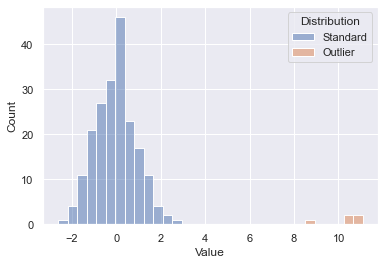

In [4]:
sns.histplot(data=df_combined, x='Value', hue='Distribution')
#sns.histplot(outlier_data)

# Fit Isolation Forest

In [5]:
# Fit
outlier_detector = IsolationForest(random_state=42)
outlier_detector.fit(df_combined.loc[:,['Value']])

IsolationForest(random_state=42)

In [6]:
# Predict
prediction = outlier_detector.predict(df_combined.loc[:,['Value']])
prediction_strings = ['Outlier' if x < 0 else 'Standard' for x in prediction]

# Review Results

In [7]:
df_combined['outlier_flag'] = prediction_strings

<AxesSubplot:xlabel='Value', ylabel='Count'>

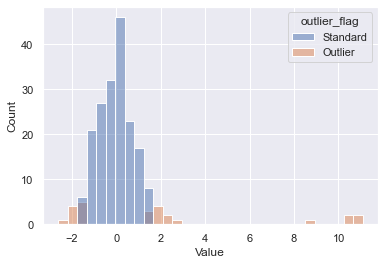

In [8]:
sns.histplot(data=df_combined, x='Value', hue='outlier_flag')

In [9]:
# Calc ground truth counts
total_points = len(df_combined)
true_outliers = len(df_combined.loc[df_combined.Distribution == 'Outlier',:])
true_standard = total_points - true_outliers

In [10]:
# Calc predicted counts
true_positive_outliers = len(df_combined.loc[(df_combined.Distribution == 'Outlier') & (df_combined.outlier_flag == 'Outlier'),:])
false_negative_outliers = len(df_combined.loc[(df_combined.Distribution == 'Outlier') & (df_combined.outlier_flag != 'Outlier'),:])
false_positive_outliers = len(df_combined.loc[(df_combined.Distribution != 'Outlier') & (df_combined.outlier_flag == 'Outlier'),:])
true_negatitive_outliers = len(df_combined.loc[(df_combined.Distribution != 'Outlier') & (df_combined.outlier_flag != 'Outlier'),:])

In [11]:
# Display percentage results
accuracy = (true_positive_outliers + true_negatitive_outliers) / total_points
precision = true_positive_outliers / (true_positive_outliers + false_positive_outliers)
recall = true_positive_outliers / (true_positive_outliers + false_negative_outliers)

In [12]:
print(f'Accuracy {accuracy:.0%}, Precision {precision:.0%}, Recall {recall:.0%}')

Accuracy 90%, Precision 20%, Recall 100%


# Explain Rules

In [13]:
clf = DecisionTreeClassifier(random_state=42, max_depth=2)
clf.fit(df_combined.loc[:,['Value']], df_combined.outlier_flag)
print(tree.export_text(clf, feature_names=['Value']))

|--- Value <= 1.57
|   |--- Value <= -1.50
|   |   |--- class: Outlier
|   |--- Value >  -1.50
|   |   |--- class: Standard
|--- Value >  1.57
|   |--- class: Outlier



In [14]:
score = clf.score(df_combined.loc[:,['Value']], df_combined.outlier_flag)
print(f'Explainer tree accuracy: {score:.0%}')

Explainer tree accuracy: 99%


# Elliptic Envelope
Run same process, but changing outlier detection algo

In [15]:
from sklearn.covariance import EllipticEnvelope

In [17]:
outlier_detector_ee = EllipticEnvelope(random_state=42)

In [18]:
outlier_detector_ee.fit(df_combined.loc[:,['Value']])

EllipticEnvelope(random_state=42)

In [19]:
prediction_ee = outlier_detector_ee.predict(df_combined.loc[:,['Value']])
prediction_strings_ee = ['Outlier' if x < 0 else 'Standard' for x in prediction_ee]

In [20]:
df_combined['outlier_flag_ee'] = prediction_strings_ee

<AxesSubplot:xlabel='Value', ylabel='Count'>

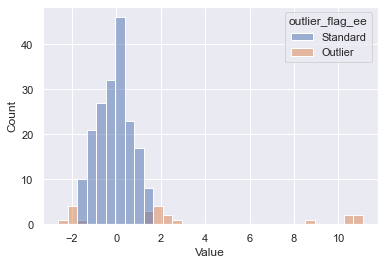

In [21]:
sns.histplot(data=df_combined, x='Value', hue='outlier_flag_ee')

In [22]:
# Calc predicted counts - ee
true_positive_outliers_ee = len(df_combined.loc[(df_combined.Distribution == 'Outlier') & (df_combined.outlier_flag_ee == 'Outlier'),:])
false_negative_outliers_ee = len(df_combined.loc[(df_combined.Distribution == 'Outlier') & (df_combined.outlier_flag_ee != 'Outlier'),:])
false_positive_outliers_ee = len(df_combined.loc[(df_combined.Distribution != 'Outlier') & (df_combined.outlier_flag_ee == 'Outlier'),:])
true_negatitive_outliers_ee = len(df_combined.loc[(df_combined.Distribution != 'Outlier') & (df_combined.outlier_flag_ee != 'Outlier'),:])

In [23]:
# Display percentage results
accuracy_ee = (true_positive_outliers_ee + true_negatitive_outliers_ee) / total_points
precision_ee = true_positive_outliers_ee / (true_positive_outliers_ee + false_positive_outliers_ee)
recall_ee = true_positive_outliers_ee / (true_positive_outliers_ee + false_negative_outliers_ee)

In [24]:
print(f'Accuracy {accuracy_ee:.0%}, Precision {precision_ee:.0%}, Recall {recall_ee:.0%}')

Accuracy 92%, Precision 24%, Recall 100%
